In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
df = pd.read_csv(r"C:\Users\kushn\Downloads\drugs_side_effects_drugs_com.csv")

In [3]:
file_path = r"C:\Users\kushn\Downloads\drugs_side_effects_drugs_com.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display the quantity of rows and columns
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
print("Columns:")
print(data.columns)

The dataset has 2931 rows and 17 columns
Columns:
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [4]:
# Show the main information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [5]:
data.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [6]:
# Dropping the 'brand_names' column and delete from dataset
data.drop(columns=['brand_names'], inplace=True)

In [7]:
# Find duplicate rows based on all columns
duplicate_rows= data[data.duplicated()]
#Count the duplicated rows
duplicate_count = duplicate_rows.shape[0]
# Print the count of duplicate rows
print("Count of Duplicate Rows:", duplicate_count)
print(duplicate_rows) # Print the duplicate rows

Count of Duplicate Rows: 0
Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews, drug_link, medical_condition_url]
Index: []


In [8]:
# Convert 'rating' and 'no_of_reviews' attributes to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
# data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')
print(data.dtypes.value_counts())

object     14
float64     2
Name: count, dtype: int64


In [9]:
# Convert 'activity' to string, remove whitespace and '%' character, then convert to float and divide by 100 
data['activity'] = data['activity'].astype(str).str.replace(r'\s+', '',regex=True).str.rstrip('%').astype('float')/100
# Display the updated 'activity' column
print(data['activity'].head())

0    0.87
1    0.82
2    0.48
3    0.41
4    0.39
Name: activity, dtype: float64


In [10]:
# Print the total number of missing values
print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns: print('\t%s: %d' % (col,data[col].isna().sum()))

There are 6192 missing values in this dataset
Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 124
	generic_name: 43
	drug_classes: 82
	activity: 0
	rx_otc: 1
	pregnancy_category: 229
	csa: 0
	alcohol: 1554
	related_drugs: 1469
	medical_condition_description: 0
	rating: 1345
	no_of_reviews: 1345
	drug_link: 0
	medical_condition_url: 0


In [11]:
# In the alcohol column we have X and null(NaN) values, because the drug can interact with alcohol or not.
# Therefore, let's replace the values of ak=lcohol column with boolean values.
# Let X will be 1 of interaction, NaN will be 0.
data['alcohol']=data['alcohol'].replace(np.nan,'0')
data['alcohol']=data['alcohol'].replace({'X': 1})

In [12]:
# To avoid missing values let's fill them with some information
# In our case we will replace all them
# Fill the null values in 'side_effects' and 'related_drugs' with no
data["side_effects"] = data['side_effects'].fillna('Unknown')
data["related_drugs"] = data['related_drugs'].fillna('Unknown')

In [13]:
# Fill the null values with 0 as a base for 'rating' and 'no_of_reviews' columns
# It will show that there are no information about it
data["rating"] = data['rating'].fillna('0')
data["no_of_reviews"] = data['no_of_reviews'].fillna('0')

In [14]:
# Fill the null values with ?
data['generic_name']=data['generic_name'].replace(np.nan,'Unknown')

In [15]:
# Fill the null values with undefined for 'drug_classes'
data['drug_classes']=data['drug_classes'].replace(np.nan,'Unknown')

In [16]:
# For these two columns we already have some category values from dataset's description
# So, let's check the categorical values
# For Rx_OTC
data["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [17]:
# For pregnancy categories
data["pregnancy_category"].unique()

array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [18]:
# Fill the null value with Unknown as a basic value
data['rx_otc']=data['rx_otc'].replace(np.nan, 'Unknown')
# Fill the null value with Unknown as a basic value
data['pregnancy_category']=data['pregnancy_category'].replace(np.nan, 'Unknown')
data['no_of_reviews'] = pd.to_numeric(data['no_of_reviews'], errors='coerce')
print(data.head())
dfs=data.copy()

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [19]:
# Let's check is there any missing values left print("There are {} missing values in this dataset".format(data.isnull().sum().sum()))
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns: print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 2931
Number of attributes = 16
Number of missing values:
	drug_name: 0
	medical_condition: 0
	side_effects: 0
	generic_name: 0
	drug_classes: 0
	activity: 0
	rx_otc: 0
	pregnancy_category: 0
	csa: 0
	alcohol: 0
	related_drugs: 0
	medical_condition_description: 0
	rating: 0
	no_of_reviews: 0
	drug_link: 0
	medical_condition_url: 0


In [20]:
data_version2=data.copy()
print(data_version2.head())
# Print head of dataset to our check

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [21]:
# Load the saved CSV file into a new DataFrame
data_ver3 = pd.read_csv('drugs_side_effects_drugs_com_version2.csv')

# Check unique values in the "pregnancy_category" column
print(data_ver3["pregnancy_category"].unique())


['D' 'C' 'X' 'B' 'N' 'Unknown' 'A']


In [22]:
data_ver3["csa"].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [23]:
data_ver3["rx_otc"].unique()

array(['Rx', 'Rx/OTC', 'OTC', 'Unknown'], dtype=object)

In [24]:
data_ver3["generic_name"].unique()

array(['doxycycline', 'spironolactone', 'minocycline', ...,
       'fenfluramine', 'phendimetrazine tartrate', 'setmelanotide'],
      dtype=object)

In [25]:
data_ver3["medical_condition"].unique()

array(['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina',
       'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer',
       'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19',
       'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea',
       'Eczema', 'Erectile Dysfunction', 'Gastrointestinal',
       'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes',
       'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence',
       'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis',
       'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis',
       'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke',
       'Swine Flu', 'UTI', 'Weight Loss'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_ver3["csa"]=label_encoder.fit_transform(data_ver3["csa"])
data_ver3["rx_otc"]=label_encoder.fit_transform(data_ver3["rx_otc"])
data_ver3["generic_name"] = label_encoder.fit_transform(data_ver3["generic_name"])
data_ver3["medical_condition"] = label_encoder.fit_transform(data_ver3["medical_condition"])
data_ver3["pregnancy_category"] = label_encoder.fit_transform(data_ver3["pregnancy_category"])
data_ver3["side_effects"] = label_encoder.fit_transform(data_ver3["side_effects"])

In [27]:
data_ver3["generic_name"].unique()

array([ 642, 1270, 1034, ...,  729, 1157, 1259])

In [28]:
data_ver3["rx_otc"].unique()

array([1, 2, 0, 3])

In [29]:
data_ver3["csa"].unique()

array([5, 0, 2, 6, 4, 3, 1])

In [30]:
data_ver3["side_effects"].unique()

array([  15, 1972, 2697, ..., 1647,  416, 1706])

In [31]:
data_ver3["medical_condition"].unique()

array([ 2,  0,  1,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 10, 15, 16,
       17, 18, 19, 20, 21, 23, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [32]:
data_ver3["pregnancy_category"].unique()

array([3, 2, 6, 1, 4, 5, 0])

In [33]:
df=pd.DataFrame(data_ver3,columns=('generic_name', 'medical_condition',
'no_of_reviews', 'side_effects', 'rating', 'csa', 'pregnancy_category', 'rx_otc','alcohol'))
df.head(10)

,generic_name,medical_condition,no_of_reviews,side_effects,rating,csa,pregnancy_category,rx_otc,alcohol
0,642,2,760.0,15,6.8,5,3,1,1
1,1270,2,449.0,1972,7.2,5,2,1,1
2,1034,2,482.0,2697,5.7,5,3,1,0
3,903,2,623.0,2570,7.9,5,6,1,1
4,505,2,146.0,1260,7.4,5,1,1,0
5,1270,2,8.0,1971,7.6,5,2,1,1
6,1335,2,439.0,1895,7.7,5,2,1,0
7,903,2,999.0,2577,8.0,5,6,1,1
8,1276,2,96.0,2702,8.5,5,3,1,1
9,162,2,86.0,2405,7.9,5,2,1,0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
print(scaled_data)

[[-0.11111578 -1.43400434  5.10119829 ...  0.28892455 -0.17025661
   1.06232778]
 [ 1.50040103 -1.43400434  2.89586941 ... -0.43301735 -0.17025661
   1.06232778]
 [ 0.89479917 -1.43400434  3.12987537 ...  0.28892455 -0.17025661
  -0.94132905]
 ...
 [ 1.21043065  1.82918864 -0.28802985 ... -0.43301735 -0.17025661
   1.06232778]
 [ 1.47217383  1.82918864 -0.28802985 ...  1.73280834 -0.17025661
  -0.94132905]
 [ 1.47217383  1.82918864 -0.28802985 ...  1.73280834 -0.17025661
  -0.94132905]]


In [35]:
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_std)

      generic_name  medical_condition  no_of_reviews  side_effects    rating  \
0        -0.111116          -1.434004       5.101198     -1.678954  0.819930   
1         1.500401          -1.434004       2.895869      0.778579  0.925271   
2         0.894799          -1.434004       3.129875      1.689009  0.530244   
3         0.558639          -1.434004       4.129719      1.529527  1.109617   
4        -0.462673          -1.434004       0.747269     -0.115526  0.977941   
...            ...                ...            ...           ...       ...   
2926     -0.832193           1.829189      -0.167481      0.757231  1.004277   
2927      0.112136           1.829189      -0.288030      0.370455 -0.970861   
2928      1.210431           1.829189      -0.288030     -1.029724 -0.970861   
2929      1.472174           1.829189      -0.288030     -1.175392 -0.970861   
2930      1.472174           1.829189      -0.288030      0.444545 -0.970861   

           csa  pregnancy_category    r

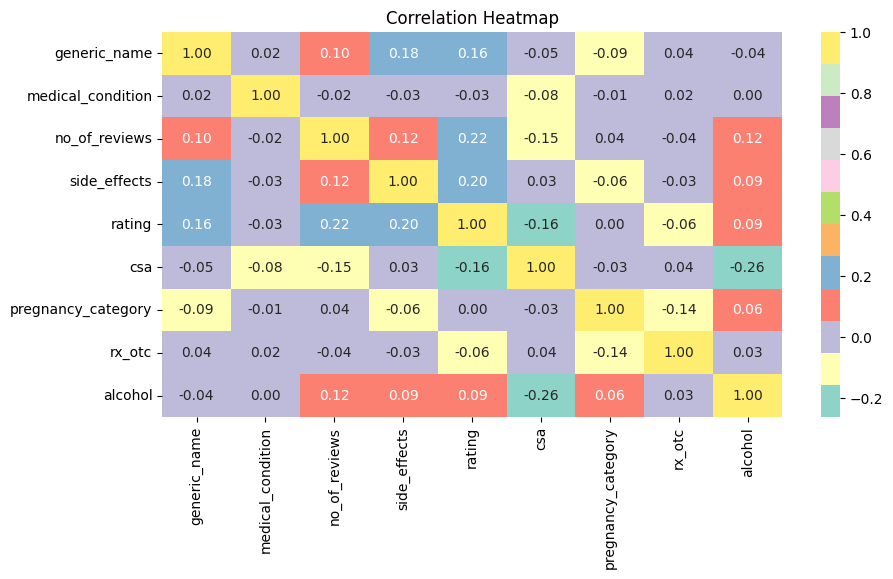

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Set3', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Read the new version dataset
data_ver4 = pd.read_csv('drugs_side_effects_drugs_com_version2.csv')
# Importing necessary libraries
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import pandas as pd
# Check for occurrence and frequency of medical conditions, sorted from highest to lowest
medical_condition_counts = data_ver4['medical_condition'].value_counts().sort_values(ascending=False)
print("\nMedical condition occurrence and frequency (sorted from highest to lowest):")
print(medical_condition_counts)


Medical condition occurrence and frequency (sorted from highest to lowest):
medical_condition
Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Bronchitis               71
Angina                   71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Cholesterol              45
Anxiety                  45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
COPD                     23
Weight Lo

In [38]:
# Save the results to CSV files if needed
medical_condition_counts.to_csv('medical_condition_counts.csv')

In [39]:
import re

# Function to get side effects from text, separated by semicolons
def extract_side_effects(text):
    # Split the text by ';' and remove extra spaces
    return [effect.strip() for effect in text.split(';')]

# Check if the 'side_effects' column is in the dataset
if 'side_effects' in data_ver4.columns:
    # Get side effects, remove empty entries, and split them
    side_effects = data_ver4['side_effects'].dropna().apply(extract_side_effects).explode()

    # Count how often each side effect appears
    side_effect_counts = side_effects.value_counts()

    # Print the results
    print("\nList of side effects with their frequencies (most to least common):")
    print(side_effect_counts)
else:
    print("The 'side_effects' column is not in the dataset.")



List of side effects with their frequencies (most to least common):
side_effects
hives                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [40]:
# Save the side effect counts to a CSV file
side_effect_counts.to_csv('side_effect_counts.csv')

In [41]:
# Function to extract drug classes from text, split by commas
def extract_drug_classes(text):
    # Split the text on commas then strip whitespace
    return [effect.strip() for effect in re.split(r'[,]', text)]
# Extract and count occurrences of drug classes
drug_classes = data_ver4['drug_classes'].dropna().apply(extract_drug_classes).explode()
drug_classes_counts = drug_classes.value_counts().sort_values(ascending=False)
print("\nDrug Classes occurrence and frequency (sorted from highest to lowest):")
print(drug_classes_counts)



Drug Classes occurrence and frequency (sorted from highest to lowest):
drug_classes
Upper respiratory combinations    245
Topical acne agents               125
Topical steroids                   94
Antihistamines                     82
Unknown                            82
                                 ... 
Antipseudomonal penicillins         1
CD52 monoclonal antibodies          1
Progestins                          1
Interferons                         1
Thioxanthenes                       1
Name: count, Length: 244, dtype: int64


In [42]:
# Save the drug classes counts to a CSV file
drug_classes_counts.to_csv('drug_classes_counts.csv')

In [43]:
# Define functions to check for specific side effects and create new boolean columns
def has_hives(text):
    return 'hives' in text.lower()
data_ver4['Hives'] = data_ver4['side_effects'].apply(has_hives)
def has_difficult_breathing(text):
    return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()
data_ver4['Difficult Breathing'] = data_ver4['side_effects'].apply(has_difficult_breathing)
def has_itching(text):
    return 'itching' in text.lower()
data_ver4['Itching'] = data_ver4['side_effects'].apply(has_itching)

In [44]:
# Define functions to check for specific drug classes and create new boolean columns
def is_usc(text):
    return 'Upper respiratory combinations' in text
data_ver4['Upper respiratory combinations'] = data_ver4['drug_classes'].apply(is_usc)
def is_steriods(text):
    return 'Topical steroids' in text
data_ver4['Topical steroids'] = data_ver4['drug_classes'].apply(is_steriods)
def is_acne(text):
    return 'Topical acne agents' in text
data_ver4['Topical acne agents'] = data_ver4['drug_classes'].apply(is_acne)

In [45]:
# Define functions to check for specific medical conditions and create new boolean columns
def has_pain(text):
    return 'Pain' in text
data_ver4['Pain'] = data_ver4['medical_condition'].apply(has_pain)
def has_colds_and_flu(text):
    return 'Colds & Flu' in text
data_ver4['Colds & Flu'] = data_ver4['medical_condition'].apply(has_colds_and_flu)
def has_acne(text):
    return 'Acne' in text
data_ver4['Acne'] = data_ver4['medical_condition'].apply(has_acne)

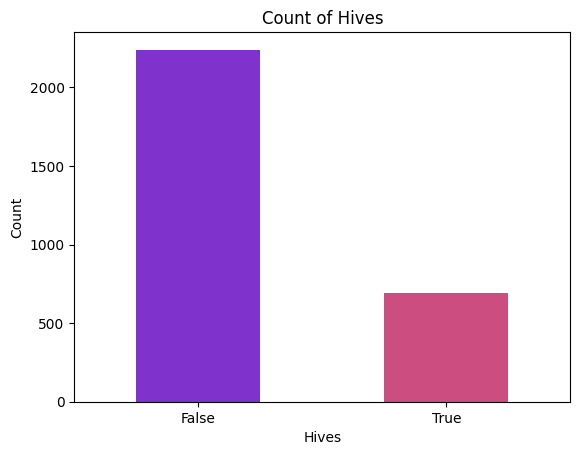

In [46]:
# Plot the count of occurrences for each side effect
import seaborn as sns
# Plot count of Hives
data_ver4['Hives'].value_counts().plot(kind='bar', color=[(0.5, 0.2, 0.8),(0.8, 0.3, 0.5)])
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

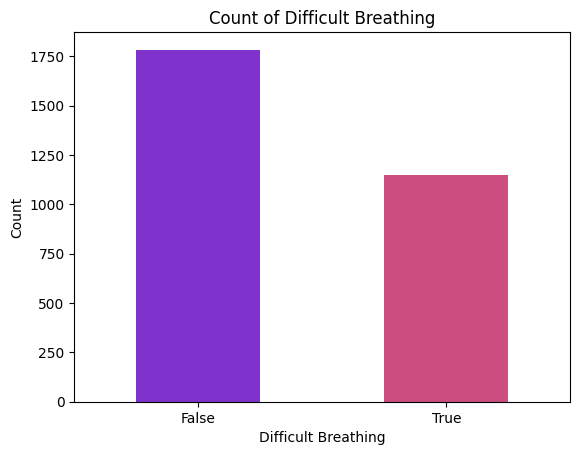

In [47]:
# Plot count of Difficult Breathing
data_ver4['Difficult Breathing'].value_counts().plot(kind='bar', color=[(0.5, 0.2, 0.8),(0.8, 0.3, 0.5)])
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

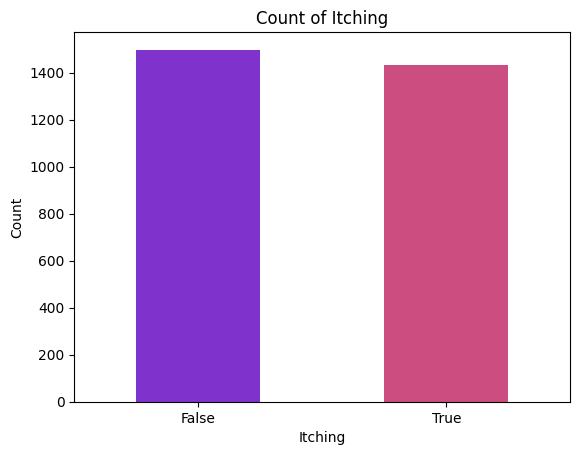

In [48]:
# Plot count of Itching
data_ver4['Itching'].value_counts().plot(kind='bar',color=[(0.5, 0.2, 0.8),(0.8, 0.3, 0.5)])
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

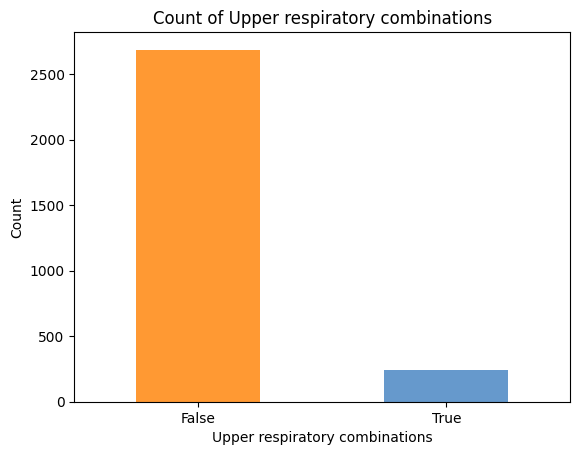

In [49]:
# Plot the count of occurrences for each drug class
# Plot count of Upper respiratory combinations
data_ver4['Upper respiratory combinations'].value_counts().plot(kind='bar', color=[(1, 0.6, 0.2),(0.4, 0.6, 0.8)])
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

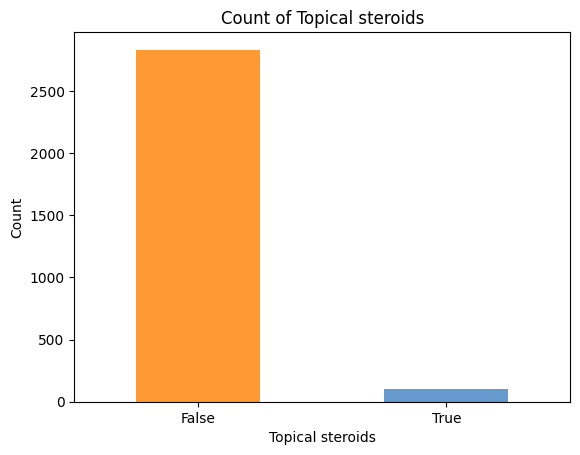

In [50]:
# Plot count of Topical steroids
data_ver4['Topical steroids'].value_counts().plot(kind='bar', color=[(1, 0.6, 0.2),(0.4, 0.6, 0.8)])
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()